# Video Game Sales with Metacritic Ratings and Comments
This dataset is a combination of Gregory Smiths's web scrape of VGChartz's video game sales with accompanying variables from a web scrape of Metacritic by Rush Kirubi. VGChartz is a video game sales tracking website, and Metacritic is a review aggregator for movies, TV shows, music albums, and video games. 

Sources: https://www.kaggle.com/gregorut/videogamesales  
&emsp;&emsp;&emsp;&emsp;https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings, accessed on July 26th, 2020. 
 
The Metacritic scraper is based on https://github.com/wtamu-cisresearch/scraper, and the VGChartz scraper is available at https://github.com/GregorUT/vgchartzScrape, and is based on BeautifulSoup.

Not all of the VGChartz observations have accompanying Metacritic data, as Metacritic does not cover all video game platforms. Those that are covered may not have complete Metacritic data.
There are around 6,900 observations with complete VGChartz and Metacritic data.

The data are through December 22nd, 2016.

## Libraries
This analysis will use the python libraries pandas, numpy, matplotlib, and seaborn.

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    print("Module 'seaborn' is installed")
except ModuleNotFoundError:
    %pip install seaborn
    import seaborn as sns
    
#try:
    #from pivottablejs import pivot_ui
    #print("Module 'pivottablejs' is installed")
#except ModuleNotFoundError:
    #%pip install pivottablejs
    #from pivottablejs import pivot_ui

import matplotlib.ticker as tick

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # Print multiple output in one cell

import datetime

Module 'seaborn' is installed
Module 'pivottablejs' is installed


## Summarizing the Data

### Reading in the Data

In [2]:
#Read in data
df = pd.read_csv("Datasets/Video_Games_Sales_as_at_22_Dec_2016.csv")

### First Look
First, let's take a look at the data:

In [3]:
#Display top 50 rows
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


#

In [4]:
df.describe()
df.dtypes

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

## Regional Game Sales
We have available sales data from North America, Europe, and Japan. What are the differences between the regions?

Text(0, 0.5, 'Sales (in millions)')

Text(0.5, 0, 'Year of Release')

Text(0.5, 1.0, 'Regional Video Games Sales')

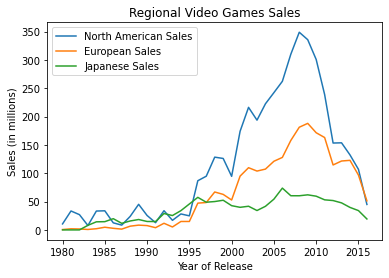

In [5]:
fig, ax = plt.subplots()

dfYear = df.groupby(by = ["Year_of_Release"]).sum()
dfYear = dfYear.reset_index() #Puts year of release back in as a column

dropYears = [2017, 2018, 2019, 2020] #Data is only through December of 2016
dfYear = dfYear[~dfYear["Year_of_Release"].isin(dropYears)] #Keep only the years outside of the drop years

ax.set_ylabel("Sales (in millions)")
ax.set_xlabel("Year of Release")
ax.set_title("Regional Video Games Sales")

ax.plot(dfYear["Year_of_Release"], dfYear["NA_Sales"], label = "North American Sales")
ax.plot(dfYear["Year_of_Release"], dfYear["EU_Sales"], label = "European Sales")
ax.plot(dfYear["Year_of_Release"], dfYear["JP_Sales"], label = "Japanese Sales")

ax.legend()

Japan makes up a significant amount of sales, particularly prior to 2000, despite having a much lower population than both North America and Europe. Despite its size, Europe has lower sales than one might expect.

In [6]:
#Group by Year and Genre, getting sum totals, and filter to 2000-2011

dfCatYear = df.groupby(by = ["Year_of_Release", "Genre"]).sum()
dfCatYear = dfCatYear.reset_index()
dfCatYear.head(5)

dfCatYear2000s = dfCatYear[dfCatYear["Year_of_Release"].isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011])]
dfCatYear2000s.dtypes
#dfCatYear2000s = pd.to_datetime(dfCatYear2000s["Year_of_Release"])

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,1980.0,Action,0.32,0.02,0.0,0.00,0.34,0.0,0.0,0.0
1,1980.0,Fighting,0.72,0.04,0.0,0.01,0.77,0.0,0.0,0.0
2,1980.0,Misc,2.53,0.15,0.0,0.02,2.71,0.0,0.0,0.0
3,1980.0,Shooter,6.56,0.43,0.0,0.08,7.07,0.0,0.0,0.0
4,1980.0,Sports,0.46,0.03,0.0,0.01,0.49,0.0,0.0,0.0


Year_of_Release    float64
Genre               object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Count         float64
dtype: object

Text(0.5, 1.0, 'Japanese Game Sales (in millions)')

[Text(0.5, 255.71333333333342, 'Year of Release')]

[Text(0.5, 0, '2000'),
 Text(1.5, 0, '2001'),
 Text(2.5, 0, '2002'),
 Text(3.5, 0, '2003'),
 Text(4.5, 0, '2004'),
 Text(5.5, 0, '2005'),
 Text(6.5, 0, '2006'),
 Text(7.5, 0, '2007'),
 Text(8.5, 0, '2008'),
 Text(9.5, 0, '2009'),
 Text(10.5, 0, '2010'),
 Text(11.5, 0, '2011')]

Text(0.5, 1.0, 'North American Game Sales (in millions)')

[Text(0.5, 255.71333333333342, 'Year of Release')]

[Text(0.5, 0, '2000'),
 Text(1.5, 0, '2001'),
 Text(2.5, 0, '2002'),
 Text(3.5, 0, '2003'),
 Text(4.5, 0, '2004'),
 Text(5.5, 0, '2005'),
 Text(6.5, 0, '2006'),
 Text(7.5, 0, '2007'),
 Text(8.5, 0, '2008'),
 Text(9.5, 0, '2009'),
 Text(10.5, 0, '2010'),
 Text(11.5, 0, '2011')]

Text(0.5, 1.0, 'European Game Sales (in millions)')

[Text(0.5, 255.71333333333342, 'Year of Release')]

[Text(0.5, 0, '2000'),
 Text(1.5, 0, '2001'),
 Text(2.5, 0, '2002'),
 Text(3.5, 0, '2003'),
 Text(4.5, 0, '2004'),
 Text(5.5, 0, '2005'),
 Text(6.5, 0, '2006'),
 Text(7.5, 0, '2007'),
 Text(8.5, 0, '2008'),
 Text(9.5, 0, '2009'),
 Text(10.5, 0, '2010'),
 Text(11.5, 0, '2011')]

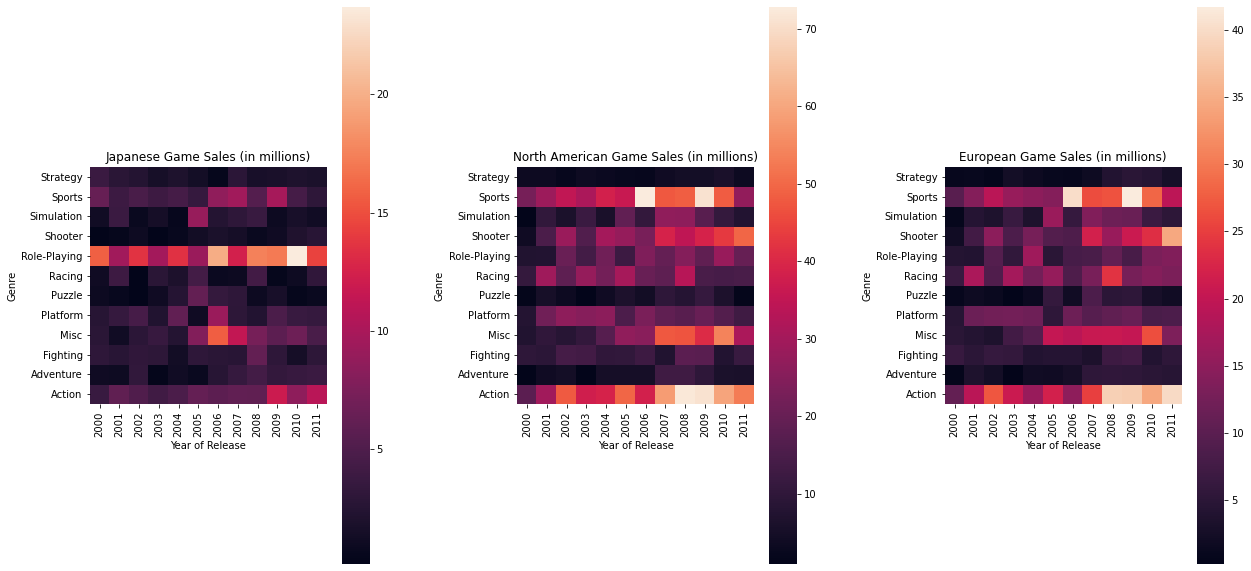

In [7]:
#Create arrays for heatmaps by region, and create heatmaps
arrayJP = dfCatYear2000s.pivot("Genre", "Year_of_Release", "JP_Sales")
arrayNA = dfCatYear2000s.pivot("Genre", "Year_of_Release", "NA_Sales")
arrayEU = dfCatYear2000s.pivot("Genre", "Year_of_Release", "EU_Sales")

fig, ax = plt.subplots(1, 3)
fig.set_figwidth(19.2)
fig.set_figheight(10.8)
fig.tight_layout(pad = 10)

xLabels = []
for i in range(12):
    if i < 10:
        xLabels.append("200" + str(i))
    else:
        xLabels.append("20" + str(i))

ax1 = sns.heatmap(arrayJP, ax=ax[0], square = True)
ax1.invert_yaxis()
ax1.set_title("Japanese Game Sales (in millions)")
ax1.set(xlabel="Year of Release")
ax1.set_xticklabels(xLabels)

ax2 = sns.heatmap(arrayNA, ax=ax[1], square = True)
ax2.invert_yaxis()
ax2.set_title("North American Game Sales (in millions)")
ax2.set(xlabel="Year of Release")
ax2.set_xticklabels(xLabels)

ax3 = sns.heatmap(arrayEU, ax=ax[2], square = True)
ax3.invert_yaxis()
ax3.set_title("European Game Sales (in millions)")
ax3.set(xlabel="Year of Release")
ax3.set_xticklabels(xLabels)

Japanese gamers prefer Role-Playing games, like Pokémon and Dragon Quest, over other genres. Both North America and Europe prefer Action games and Sports games. What are the top selling games for each region?

In [8]:
dfTop5NA = df.nlargest(5, "NA_Sales", keep = "all")
dfTop5NA.head()

dfTop5EU = df.nlargest(5, "EU_Sales", keep = "all")
dfTop5EU.head()

dfTop5JP = df.nlargest(5, "JP_Sales", keep = "all")
dfTop5JP.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.74,9.20,4.16,2.04,20.15,77.0,58.0,7.9,50.0,Nintendo,E


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,NaN,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.38,4.46,6.04,1.36,18.25,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\arqui\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Name', ylabel='JP_Sales'>

Text(0.5, 173.4, 'Game')

Text(318.59999999999997, 0.5, 'Sales (in millions)')

[Text(0, 0, 'Wii Sports'),
 Text(1, 0, 'Super Mario Bros.'),
 Text(2, 0, 'Duck Hunt'),
 Text(3, 0, 'Tetris'),
 Text(4, 0, 'Mario Kart Wii')]

Text(0.5, 1.0, 'Top 5 North American Games')

Text(0.5, 173.4, 'Game')

Text(1074.8541176470587, 0.5, 'Sales (in millions)')

[Text(0, 0, 'Wii Sports'),
 Text(1, 0, 'Mario Kart Wii'),
 Text(2, 0, 'Nintendogs'),
 Text(3, 0, 'Wii Sports Resort'),
 Text(4, 0, 'Brain Age: Train Your Brain in Minutes a Day')]

Text(0.5, 1.0, 'Top 5 European Games')

Text(0.5, 173.4, 'Game')

Text(1831.1082352941175, 0.5, 'Sales (in millions)')

[Text(0, 0, 'Pokemon Red/Pokemon Blue'),
 Text(1, 0, 'Pokemon Gold/Pokemon Silver'),
 Text(2, 0, 'Super Mario Bros.'),
 Text(3, 0, 'New Super Mario Bros.'),
 Text(4, 0, 'Pokemon Diamond/Pokemon Pearl')]

Text(0.5, 1.0, 'Top 5 Japanese Games')

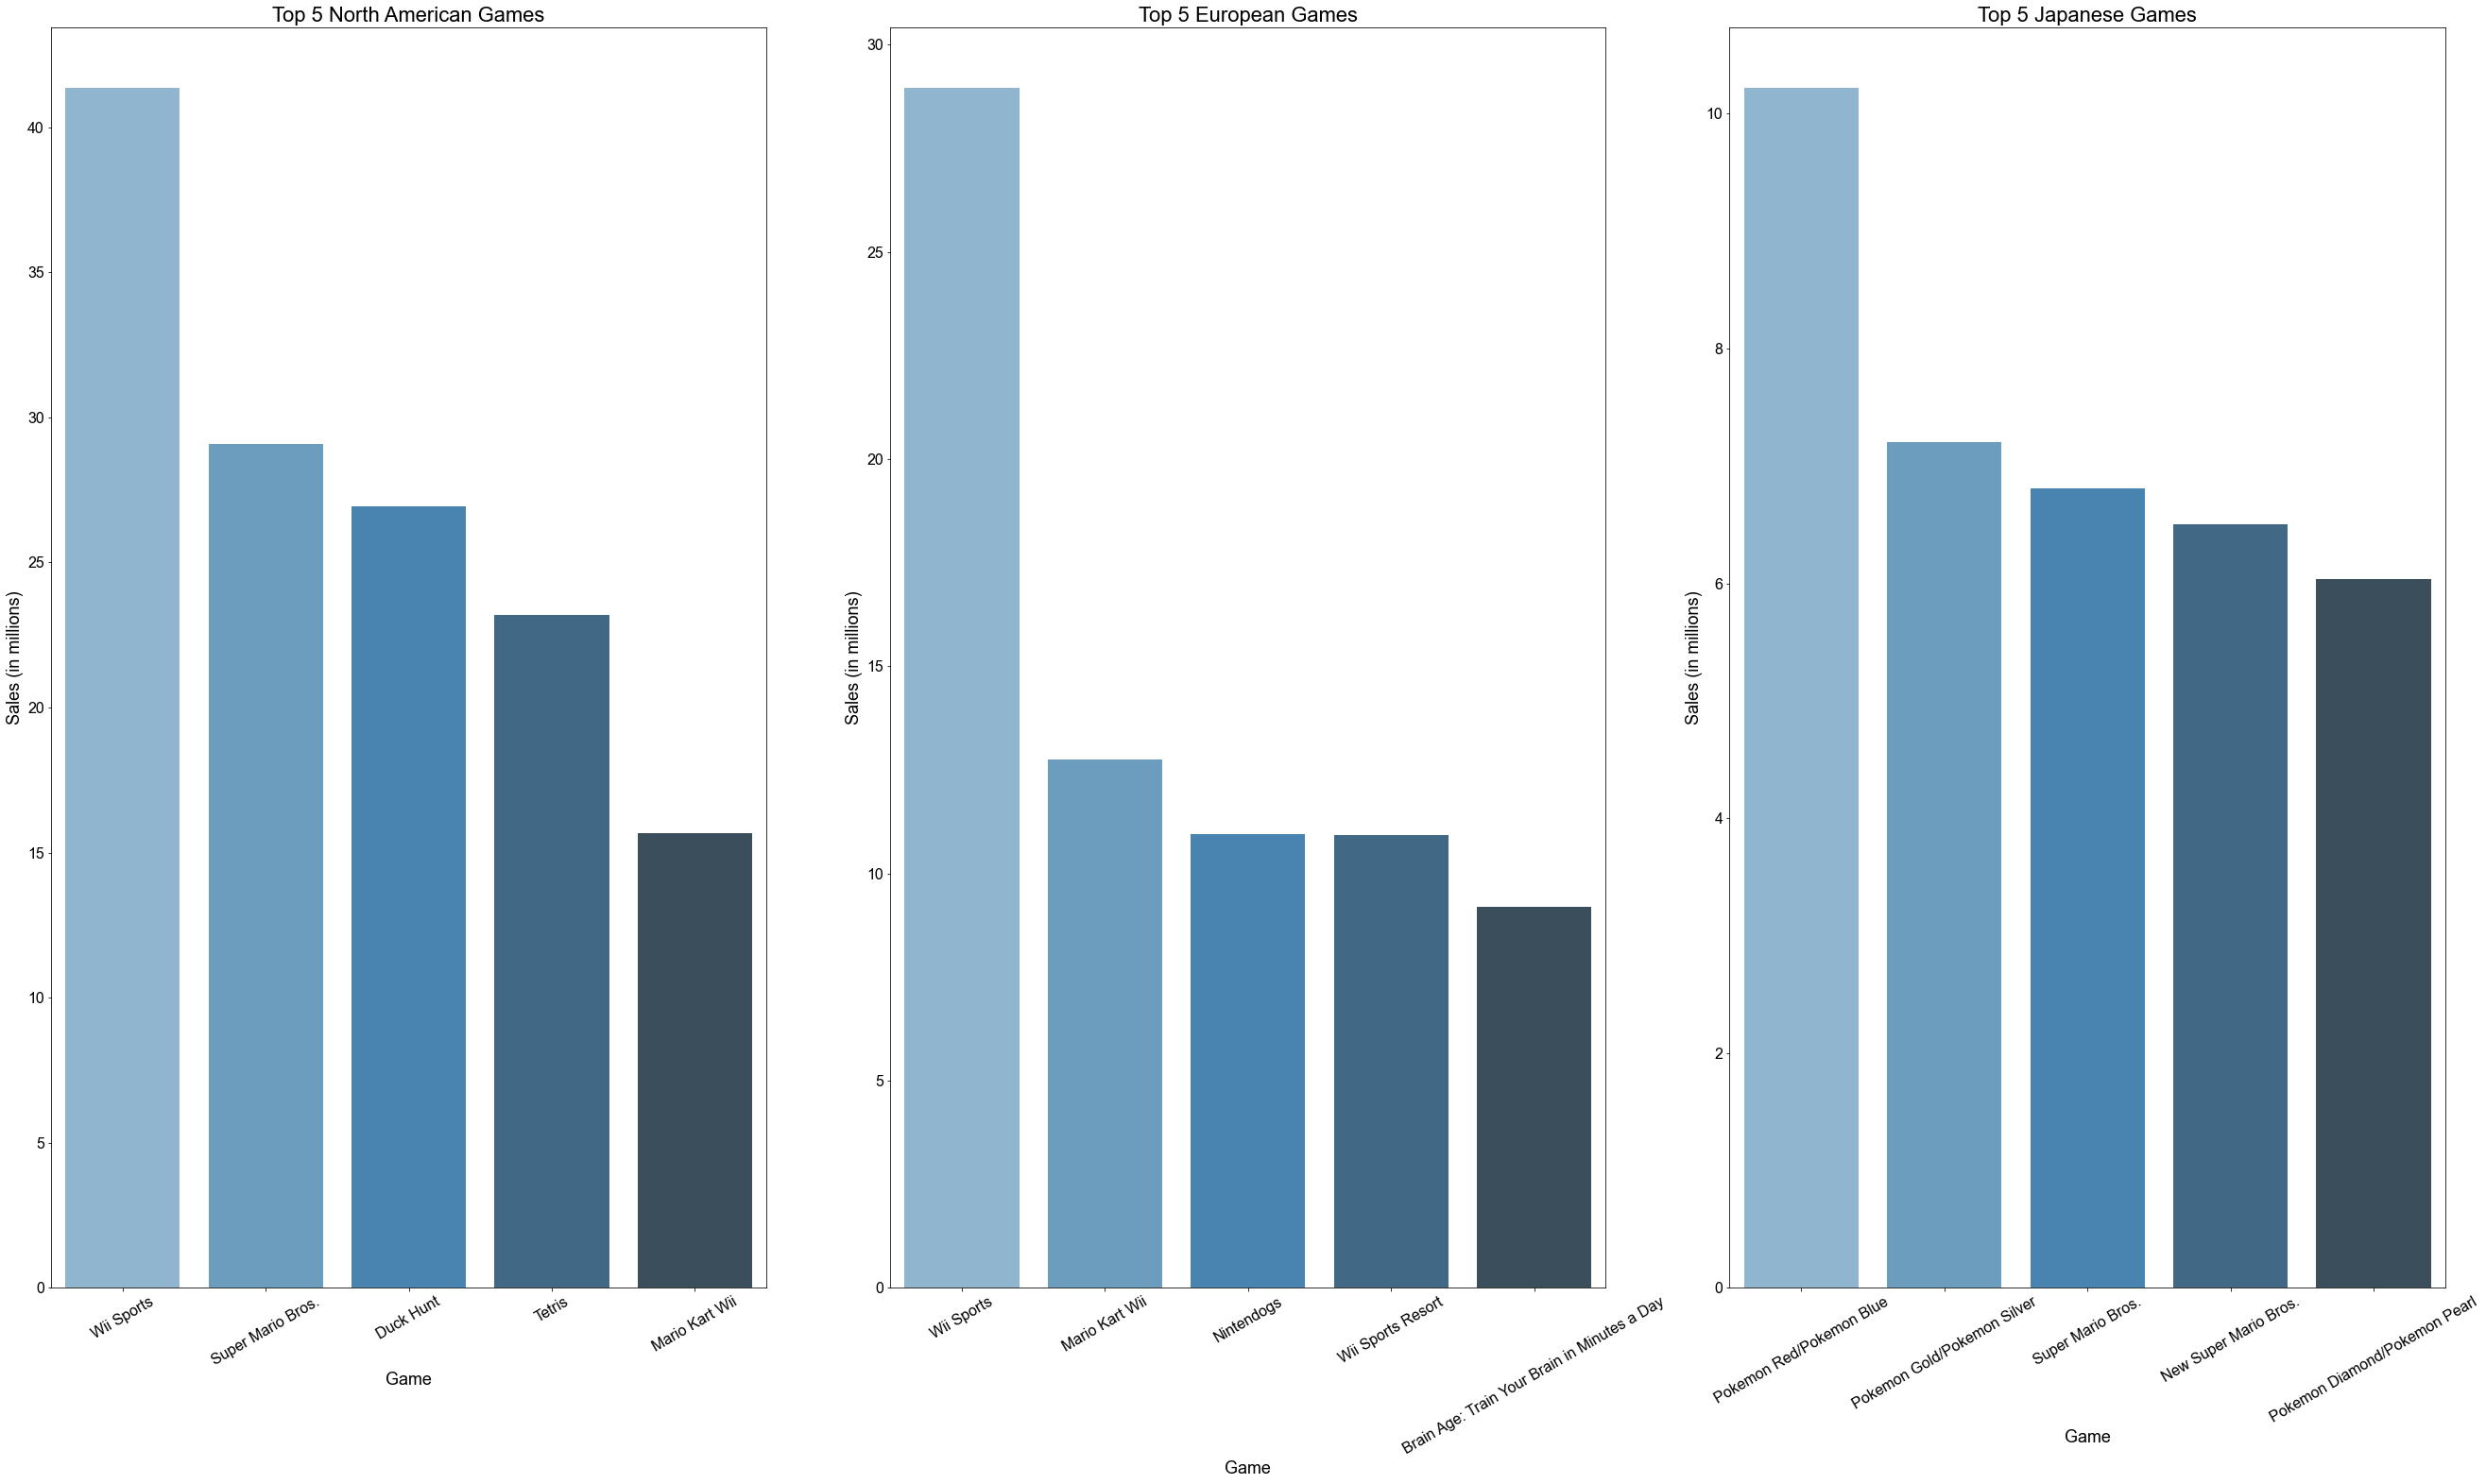

In [9]:
fig, ax = plt.subplots(1, 3)

fig.set_figwidth(38.40)
fig.set_figheight(21.6)
fig.tight_layout(pad = 10)

sns.barplot(dfTop5JP["Name"], dfTop5NA["JP_Sales"])

ax1 = sns.barplot(x = dfTop5NA["Name"], y = dfTop5NA["NA_Sales"], ax = ax[0], palette="Blues_d")
ax1.set_xlabel("Game", fontsize = 18)
ax1.set_ylabel("Sales (in millions)", fontsize = 18)
ax1.set_xticklabels(dfTop5NA["Name"], fontsize = 16, rotation = 30)
ax1.tick_params(axis = "y", labelsize = 16)
ax1.set_title("Top 5 North American Games", fontsize = 22)

ax2 = sns.barplot(x = dfTop5EU["Name"], y = dfTop5EU["EU_Sales"], ax = ax[1], palette="Blues_d")
ax2.set_xlabel("Game", fontsize = 18)
ax2.set_ylabel("Sales (in millions)", fontsize = 18)
ax2.set_xticklabels(dfTop5EU["Name"], fontsize = 16, rotation = 30)
ax2.tick_params(axis = "y", labelsize = 16)
ax2.set_title("Top 5 European Games", fontsize = 22)

ax3 = sns.barplot(x = dfTop5JP["Name"], y = dfTop5JP["JP_Sales"], ax = ax[2], palette="Blues_d")
ax3.set_xlabel("Game", fontsize = 18)
ax3.set_ylabel("Sales (in millions)", fontsize = 18)
ax3.set_xticklabels(dfTop5JP["Name"], fontsize = 16, rotation = 30)
ax3.tick_params(axis = "y", labelsize = 16)
ax3.set_title("Top 5 Japanese Games", fontsize = 22)

sns.set_theme()

Predictably, the best-selling games tend to be games that are either bundled with the console purchase or peripherals. The Wii's commercial success led to Wii Sports having the highest sales for both North America and Europe. Pokémon takes up 3 of the 5 best-selling games in Japan. Next, which developers had the most sales?

In [10]:
dfDevelopers = df.groupby(by = ["Developer"]).sum()
dfDevelopers = dfDevelopers.reset_index()
dfDevelopers = dfDevelopers.nlargest(5, "Global_Sales", keep = "all")
dfDevelopers.head(5)

,Developer,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
1020,Nintendo,144526.0,231.34,167.37,89.41,43.66,531.71,5726.0,3467.0,24739.0
449,EA Sports,339203.0,96.84,55.51,0.79,22.17,175.38,12298.0,3544.0,10159.0
431,EA Canada,329100.0,66.20,54.32,1.13,20.65,142.32,12108.0,4135.0,7871.0
1539,Ubisoft,403792.0,76.91,41.64,0.87,13.13,132.54,7928.0,2252.0,12940.0
1220,Rockstar North,28111.0,55.23,38.17,2.88,23.20,119.47,1300.0,756.0,26860.0


Text(0.5, 0, 'Developer')

Text(0, 0.5, 'Global Sales (in millions)')

Text(0.5, 1.0, 'Top 5 Developers by Sales')

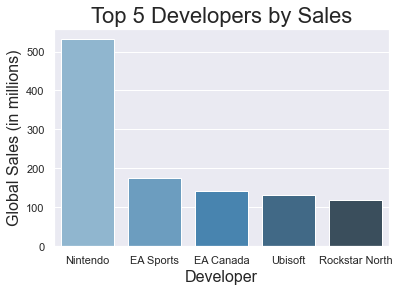

In [11]:
ax1 = sns.barplot(x = dfDevelopers["Developer"], y = dfDevelopers["Global_Sales"], palette = "Blues_d")
ax1.set_xlabel("Developer", fontsize = 16)
ax1.set_ylabel("Global Sales (in millions)", fontsize = 16)
ax1.set_title("Top 5 Developers by Sales", fontsize = 22)

In video gaming, developers are responsible for making the game, while publishers are typically responsible for funding. While the developer and publisher are often one and the same (or, the publisher owns the development studio), it is not always the case.

Nintendo dominates with over $500,000,000 in sales. Note that some companies, like Electronic Arts, are divided into divisions even though they can be considered part of the same company.

In [12]:
dfCount = df.groupby(by = ["Platform"]).agg("count")
dfCount = dfCount.reset_index()
dfCount = dfCount.nlargest(5, "Name", keep = "all")
dfCount.head(5)

top5Platforms = dfCount["Platform"]

dfCount = df[df["Platform"].isin(top5Platforms)]

,Platform,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,PS2,2161,2127,2161,2159,2161,2161,2161,2161,2161,1298,1298,1481,1241,1481,1481
4,DS,2152,2122,2152,2147,2152,2152,2152,2152,2152,717,717,1273,516,1279,1274
17,PS3,1331,1306,1331,1328,1331,1331,1331,1331,1331,820,820,964,877,968,952
26,Wii,1320,1286,1320,1319,1320,1320,1320,1320,1320,585,585,1000,560,1012,1002
28,X360,1262,1232,1262,1259,1262,1262,1262,1262,1262,916,916,1050,966,1061,1052


Text(0.5, 0, 'Platform')

Text(0, 0.5, 'Number of Games')

Text(0.5, 1.0, 'Top 5 Platforms by Number of Games')

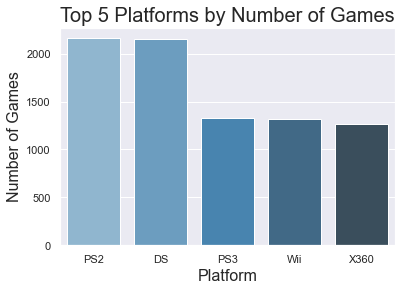

In [13]:
ax1 = sns.countplot(x = dfCount["Platform"], data = df, order = top5Platforms, palette = "Blues_d")

ax1.set_xlabel("Platform", fontsize = 16)
ax1.set_ylabel("Number of Games", fontsize = 16)
ax1.set_title("Top 5 Platforms by Number of Games", fontsize = 20)

The Playstation 2 and DS have the most titles, with the seventh generation of consoles following behind.

We can also look at video game review, both from critics (typically video game journalists) and users (anyone with a Metacritic account). We'll limit it to games with more than 100 reviews.

In [21]:
dfCount = df.dropna(subset=["User_Score"])
dfCount["User_Score"] = pd.to_numeric(dfCount["User_Score"], errors = "coerce")
dfCount = dfCount.loc[df["User_Count"] > 100]
dfCount.dtypes

dfUserScoreLargest = dfCount.nlargest(5, "User_Score", keep = "all")
display(dfUserScoreLargest)

dfUserScoreSmallest = dfCount.nsmallest(5, "User_Score", keep = "all")
display(dfUserScoreSmallest)

<ipython-input-21-0a4b65f30ffb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCount["User_Score"] = pd.to_numeric(dfCount["User_Score"], errors = "coerce")


Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
3417,Harvest Moon: Friends of Mineral Town,GBA,2003.0,Simulation,Ubisoft,0.34,0.13,0.11,0.01,0.59,81.0,25.0,9.6,116.0,TOSE,E
1645,Golden Sun: The Lost Age,GBA,2002.0,Role-Playing,Nintendo,0.61,0.27,0.27,0.07,1.22,86.0,29.0,9.5,150.0,Camelot Software Planning,E
10106,Cory in the House,DS,2007.0,Action,Disney Interactive Studios,0.10,0.00,0.00,0.01,0.11,NaN,NaN,9.5,1273.0,Handheld Games,E
146,Metal Gear Solid,PS,1998.0,Action,Konami Digital Entertainment,3.18,1.83,0.78,0.24,6.03,94.0,20.0,9.4,918.0,KCEJ,M
712,Paper Mario: The Thousand-Year Door,GC,2004.0,Role-Playing,Nintendo,1.48,0.25,0.46,0.06,2.25,87.0,55.0,9.4,306.0,Intelligent Systems,E
1068,Resident Evil 4,GC,2005.0,Action,Capcom,0.98,0.42,0.22,0.06,1.69,96.0,82.0,9.4,767.0,Capcom,M
1546,Castlevania: Symphony of the Night,PS,1997.0,Platform,Konami Digital Entertainment,0.58,0.40,0.21,0.08,1.27,93.0,12.0,9.4,358.0,Konami,T
1712,Shenmue,DC,1999.0,Adventure,Sega,0.52,0.24,0.38,0.04,1.18,88.0,9.0,9.4,201.0,Sega AM2,T
8905,Shenmue II,DC,2001.0,Adventure,Sega,0.00,0.00,0.15,0.00,0.15,88.0,9.0,9.4,201.0,Sega AM2,T


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
13690,Ride to Hell,PS3,2013.0,Racing,Deep Silver,0.02,0.01,0.0,0.01,0.04,13.0,4.0,1.0,218.0,"Eutechnyx, Deep Silver",M
10842,MindJack,X360,2011.0,Shooter,Square Enix,0.07,0.02,0.0,0.01,0.09,43.0,42.0,1.2,116.0,FeelPlus,M
12823,Ride to Hell,X360,2013.0,Racing,Deep Silver,0.04,0.01,0.0,0.01,0.06,19.0,14.0,1.3,433.0,"Eutechnyx, Deep Silver",M
15408,Sacred 3,PC,2014.0,Role-Playing,Deep Silver,0.00,0.02,0.0,0.00,0.02,57.0,47.0,1.4,544.0,Deep Silver,M
7480,Tony Hawk's Pro Skater 5,PS4,2015.0,Sports,Activision,0.09,0.08,0.0,0.03,0.21,32.0,43.0,1.5,427.0,Robomodo,T


Interestingly, the highest user-reviewed games are from older console generations, while the lowest are from newer. There is only one PC game that appears in either.